In [1]:
import cowsay

cowsay.tux('Welcome to part 2 of my code. Here you can see:  how I use PD model, logistic regression for train & test data, find p values, plot ROC curve, calculate GINI, KS lines, and use both PD and threshold to make Cut-offs.')

  _________________________________________________
 /                                                 \
| Welcome to part 2 of my code. Here you can see:   |
| how I use PD model, logistic regression for train |
|  & test data, find p values, plot ROC curve, calc |
| ulate GINI, KS lines, and use both PD and thresho |
| ld to make Cut-offs.                              |
 \                                                 /
                                                      \
                                                       \
                                                        \
                                                         .--.
                                                        |o_o |
                                                        |:_/ |
                                                       //   \ \
                                                      (|     | )
                                                     /'\_   _/`\
                   

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Loading the Data and Selecting the Features

### Import Data

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None, skiprows = 1)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None, skiprows = 1)

### Explore Data

In [4]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(373028, 321)
(373028, 1)
(93257, 321)
(93257, 1)


### Selecting the Features

In [5]:
# all the useful preprocessed columns we did in the last notebook
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, [
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:small_educ_moving',
    'purpose:house_other_renewable_medical',
    'purpose:wedding_vaca',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:improve_major_car',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10+',
    'mnths_since_issue_d: < 38',
    'mnths_since_issue_d: 38~39',
    'mnths_since_issue_d: 40~41',
    'mnths_since_issue_d: 42~48',
    'mnths_since_issue_d: 49~52',
    'mnths_since_issue_d: 53~64',
    'mnths_since_issue_d: 65~84',
    'mnths_since_issue_d: > 84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mnths_since_earliest_cr_line:<164.36',
    'mnths_since_earliest_cr_line:164.36-246.54',
    'mnths_since_earliest_cr_line:264.54-270.72',
    'mnths_since_earliest_cr_line:270.72-352.2',
    'mnths_since_earliest_cr_line:352.2-399.16',
    'mnths_since_earliest_cr_line:>399.16',
    'delinq_2yrs:0',
    'delinq_2yrs:1-3',
    'delinq_2yrs:>=4',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'open_acc:<5.04',
    'open_acc:5.04-15.12',
    'open_acc:15.12-23.52',
    'open_acc:>23.52',
    'pub_rec:0-2',
    'pub_rec:3-4',
    'pub_rec:>=5',
    'total_acc:<=27',
    'total_acc:28-51',
    'total_acc:>=52',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'total_rev_hi_lim:<=5K',
    'total_rev_hi_lim:5K-10K',
    'total_rev_hi_lim:10K-20K',
    'total_rev_hi_lim:20K-30K',
    'total_rev_hi_lim:30K-40K',
    'total_rev_hi_lim:40K-55K',
    'total_rev_hi_lim:55K-95K',
    'total_rev_hi_lim:>95K',
    'annual_inc:<20k',
    'annual_inc: 20k-30k',
    'annual_inc: 30k-40k',
    'annual_inc: 40k-50k',
    'annual_inc: 50k-60k',
    'annual_inc: 60k-70k',
    'annual_inc: 70k-80k',
    'annual_inc: 80k-90k',
    'annual_inc: 90k-100k',
    'annual_inc: 100k-120k',
    'annual_inc: 120k-140k',
    'annual_inc:>140k',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>86'
]]

# select all the reference columns
# Columns with lowest/worst results are being set as reference column
ref_categories = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:small_educ_moving',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mnths_since_issue_d: > 84',
    'int_rate:>20.281',
    'mnths_since_earliest_cr_line:<164.36',
    'delinq_2yrs:>=4',
    'inq_last_6mths:>6',
    'open_acc:<5.04',
    'pub_rec:0-2',
    'total_acc:<=27',
    'acc_now_delinq:0',
    'total_rev_hi_lim:<=5K',
    'annual_inc:<20k',
    'dti:>35',
    'mths_since_last_delinq:0-3', # cannot use Missing value as Reference!
    'mths_since_last_record:0-2' # cannot use Missing value as Reference!
]

In [6]:
# Check the results, we are all good
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

### Logistic Regression

In [7]:
pd.options.display.max_rows = None

reg = LogisticRegression()
reg.fit(inputs_train, loan_data_targets_train)

LogisticRegression()

In [8]:
# Intercepts

print( 'This is the intercept of the regression: ',reg.intercept_)


This is the intercept of the regression:  [-1.44754017]


In [9]:
# coefficients of dependent variables
reg.coef_

array([[ 1.13543978,  0.89520262,  0.69713706,  0.50579363,  0.3268653 ,
         0.13847912,  0.09326326,  0.11133267,  0.03649619,  0.0586742 ,
         0.05847492,  0.06092789,  0.07787297,  0.13545112,  0.09898926,
         0.18469649,  0.24386115,  0.22389984,  0.26175036,  0.32161671,
         0.51292936,  0.08469258, -0.01260323,  0.35463451,  0.58735194,
         0.4565238 ,  0.35352857,  0.41744125,  0.05395604,  0.07820838,
         0.09759261,  0.12184391,  0.08736348,  0.05999132,  0.12399162,
         1.06169058,  0.86328203,  0.76322555,  0.56293619,  0.39909966,
         0.15267863, -0.07913703,  0.87292993,  0.54465286,  0.29465695,
         0.10633685, -0.00697166,  0.02104923,  0.07150114,  0.0966359 ,
         0.03930603,  0.08086731,  0.04099267,  0.64366532,  0.50091638,
         0.29078034, -0.12672911, -0.15235797, -0.18009942,  0.12772292,
         0.17851663, -0.01507561,  0.03465685,  0.20166633,  0.0496135 ,
         0.02742053,  0.02906883,  0.04434023,  0.0

In [10]:
# Apply the proper formatting

feature_name = inputs_train.columns.values

In [11]:


# Summary table

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

# Add the Intercept to be the very 1st row
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.447540
1,grade:A,1.135440
2,grade:B,0.895203
3,grade:C,0.697137
4,grade:D,0.505794
5,grade:E,0.326865
6,grade:F,0.138479
7,home_ownership:OWN,0.093263
8,home_ownership:MORTGAGE,0.111333
9,addr_state:NM_VA,0.036496


### Build a Logistic Regression Model with P-values

In [12]:
# Define add p-values into our logistic regression process:

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [13]:
reg = LogisticRegression_with_p_values()

In [14]:
reg.fit(inputs_train,loan_data_targets_train)

In [15]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

# add p_value
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values)) # NaN is for Intercept

summary_table['p_values'] = p_values
summary_table

# Now we can add proper p_value

,Feature name,Coefficients,p_values
0,Intercept,-1.447540,NaN
1,grade:A,1.135440,8.668493e-36
2,grade:B,0.895203,1.124251e-48
3,grade:C,0.697137,5.682303e-35
4,grade:D,0.505794,3.276334e-21
5,grade:E,0.326865,5.290363e-12
6,grade:F,0.138479,4.922928e-03
7,home_ownership:OWN,0.093263,3.773914e-06
8,home_ownership:MORTGAGE,0.111333,1.737775e-18
9,addr_state:NM_VA,0.036496,2.547671e-01


After double-checking p_values, 

for the Final Model, We remove:

delinq_2yrs


open_acc


pub_rec


total_rev_hi_lim


total_acc

#### Remove those columns and we get:

In [16]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, [
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:small_educ_moving',
    'purpose:house_other_renewable_medical',
    'purpose:wedding_vaca',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:improve_major_car',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10+',
    'mnths_since_issue_d: < 38',
    'mnths_since_issue_d: 38~39',
    'mnths_since_issue_d: 40~41',
    'mnths_since_issue_d: 42~48',
    'mnths_since_issue_d: 49~52',
    'mnths_since_issue_d: 53~64',
    'mnths_since_issue_d: 65~84',
    'mnths_since_issue_d: > 84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mnths_since_earliest_cr_line:<164.36',
    'mnths_since_earliest_cr_line:164.36-246.54',
    'mnths_since_earliest_cr_line:264.54-270.72',
    'mnths_since_earliest_cr_line:270.72-352.2',
    'mnths_since_earliest_cr_line:352.2-399.16',
    'mnths_since_earliest_cr_line:>399.16',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'annual_inc:<20k',
    'annual_inc: 20k-30k',
    'annual_inc: 30k-40k',
    'annual_inc: 40k-50k',
    'annual_inc: 50k-60k',
    'annual_inc: 60k-70k',
    'annual_inc: 70k-80k',
    'annual_inc: 80k-90k',
    'annual_inc: 90k-100k',
    'annual_inc: 100k-120k',
    'annual_inc: 120k-140k',
    'annual_inc:>140k',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>86'
]]

In [17]:
# update reference categories

ref_categories = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:small_educ_moving',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mnths_since_issue_d: > 84',
    'int_rate:>20.281',
    'mnths_since_earliest_cr_line:<164.36',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'annual_inc:<20k',
    'dti:>35',
    'mths_since_last_delinq:0-3', # cannot use Missing value as Reference!
    'mths_since_last_record:0-2' # cannot use Missing value as Reference!
]

In [18]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [19]:
# Overwrite and reset or regression using columns with high relevance
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [20]:
feature_name = inputs_train.columns.values

In [21]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)

summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()

p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values


summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.460291,NaN
1,grade:A,1.122070,3.876277e-35
2,grade:B,0.873111,2.034091e-46
3,grade:C,0.676501,4.661873e-33
4,grade:D,0.485834,1.029578e-19
5,grade:E,0.311854,4.409787e-11
6,grade:F,0.124431,1.138978e-02
7,home_ownership:OWN,0.095466,2.139606e-06
8,home_ownership:MORTGAGE,0.109057,5.670283e-18
9,addr_state:NM_VA,0.038096,2.342228e-01


Reference category serves to compare the odds of the rest of the dummy variables to it

# PD Model Validation (Test)

### Out-of-sample Validation(test）

In [22]:
# Train_file to train the data, 
# Test_file to test the data.

inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,[
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:small_educ_moving',
    'purpose:house_other_renewable_medical',
    'purpose:wedding_vaca',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:improve_major_car',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10+',
    'mnths_since_issue_d: < 38',
    'mnths_since_issue_d: 38~39',
    'mnths_since_issue_d: 40~41',
    'mnths_since_issue_d: 42~48',
    'mnths_since_issue_d: 49~52',
    'mnths_since_issue_d: 53~64',
    'mnths_since_issue_d: 65~84',
    'mnths_since_issue_d: > 84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mnths_since_earliest_cr_line:<164.36',
    'mnths_since_earliest_cr_line:164.36-246.54',
    'mnths_since_earliest_cr_line:264.54-270.72',
    'mnths_since_earliest_cr_line:270.72-352.2',
    'mnths_since_earliest_cr_line:352.2-399.16',
    'mnths_since_earliest_cr_line:>399.16',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'annual_inc:<20k',
    'annual_inc: 20k-30k',
    'annual_inc: 30k-40k',
    'annual_inc: 40k-50k',
    'annual_inc: 50k-60k',
    'annual_inc: 60k-70k',
    'annual_inc: 70k-80k',
    'annual_inc: 80k-90k',
    'annual_inc: 90k-100k',
    'annual_inc: 100k-120k',
    'annual_inc: 120k-140k',
    'annual_inc:>140k',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>86'
]]

ref_categories = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'verification_status:Verified',
    'purpose:small_educ_moving',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mnths_since_issue_d: > 84',
    'int_rate:>20.281',
    'mnths_since_earliest_cr_line:<164.36',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'annual_inc:<20k',
    'dti:>35',
    'mths_since_last_delinq:0-3', # cannot use Missing value as Reference!
    'mths_since_last_record:0-2' # cannot use Missing value as Reference!
]

In [23]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [24]:
# logistic_regression_model.predict(df with independent variables)


y_hat_test = reg2.model.predict(inputs_test) # In default, (p) >= 0.5 is Good borrowers, (p) < 0.5 is bad borrowers
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [25]:
# model.predict_proda(inputs)

y_hat_test_proba = reg2.model.predict_proba(inputs_test)
y_hat_test_proba
# 1st value is (p) default, 2nd value is (p) paid off

array([[0.07577692, 0.92422308],
       [0.14938703, 0.85061297],
       [0.1132935 , 0.8867065 ],
       ...,
       [0.02756385, 0.97243615],
       [0.04021014, 0.95978986],
       [0.04803064, 0.95196936]])

In [26]:
# get the probability of being good borrower
y_hat_test_proba = y_hat_test_proba[: ][: ,1]

In [27]:
# create temp to backup

loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [28]:
# Combine probs and hat_test results

df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [29]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

df_actual_predicted_probs.shape

(93257, 2)

In [30]:
# Add index from test index, into our predicted probability index

df_actual_predicted_probs.index = loan_data_inputs_test.index
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.924223
288564,1,0.850613
213591,1,0.886706
263083,1,0.942769
165001,1,0.969465


So here is next question. How accurate the model is?

In [31]:


# first, define the cutoff probability

tr = 0.9 #(default cutoff)

df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [32]:
#rows are predicted，columns are actual

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7378,2812
1,35750,47317


In [33]:
# calculate overall probability of good predictions
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0] # divided by all observations count.


Predicted,0,1
Actual,,
0,0.079115,0.030153
1,0.383349,0.507383


In [34]:
# Overall acurracy

(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.5864975283356746

In [35]:
# Originally checked treshold to be 0.5, but that is way too out-of-boundary.
# Then setup treshold to be 0.9, generating overall accuracy around 58%
# With higher threshold, although it reduced number of default dramatically, it also reduced number of overall approved applications

# We could use Receiver Operation Characteristic Curve ~~ ROC curve to determine what is the best threshold value
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Three lines!!
# 1st array: False Positive Rate
# 2nd array: True Positive Rate
# 3rd array: Thresholds

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99276958, 0.99276958, 0.99084819, ..., 0.48216251, 0.42242558,
        0.35756513]))

In [36]:
# fpr for false positive rate, tpr for treu positive rate
# name those definitions from our function

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

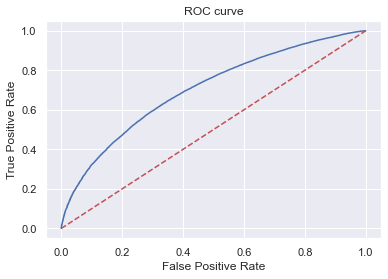

In [37]:
# Now plot the curve

plt.plot(fpr, tpr) # 先画一个roc curve
plt.plot(fpr, fpr, linestyle = '--', color = 'r') # <-- this is benchmark line (predicting by chance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

# don't forget to add benchmark.
# Area Under the Curve --->> AUC area.

In [38]:
# Area under the curve
# whether the result good enough, really depends on original data input

AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

 # Interpretation   ||      Area under ROC curve
#      BAD                        50%-60%
#      Poor                       60%-70%
#      Fair                       70%-80%
#      Good                       80%-90%
#   Excellent                     90%-100%

#### So our model is Fairly predicted.


0.702371818211278

### Evaluation of the model Performance

#### Two ways to do it : Gini coef And Kolmogorov-Smirnov coef

#### >>>>>>>>>> First, Let's try GINI coef method

In [39]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba') # Sort in descending order
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42344,1,0.357565,0
42341,1,0.381365,0
42396,0,0.422426,0
40173,0,0.439728,0
40518,0,0.454114,0


In [40]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
239098,1,0.991246,1
231463,1,0.991383,1
239228,1,0.991525,1
261086,1,0.992143,1
242624,1,0.992770,1


In [41]:
# reset index method pd.reset_index()
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()


In [42]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42344,1,0.357565,0
1,42341,1,0.381365,0
2,42396,0,0.422426,0
3,40173,0,0.439728,0
4,40518,0,0.454114,0


In [43]:
# Now lets calculate cumulative area

# df.cumsum() sums all rows until a given point

df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42344,1,0.357565,0,1,1,0
1,42341,1,0.381365,0,2,2,0
2,42396,0,0.422426,0,3,2,1
3,40173,0,0.439728,0,4,2,2
4,40518,0,0.454114,0,5,2,3


In [44]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42344,1,0.357565,0,1,1,0,0.000011,0.000012,0.000000
1,42341,1,0.381365,0,2,2,0,0.000021,0.000024,0.000000
2,42396,0,0.422426,0,3,2,1,0.000032,0.000024,0.000098
3,40173,0,0.439728,0,4,2,2,0.000043,0.000024,0.000196
4,40518,0,0.454114,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

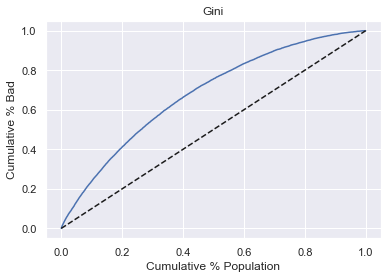

In [45]:
# Now we are good to plot

plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color for those comparison.
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [46]:
# Calculate Gini

Gini = AUROC * 2 - 1
Gini

0.40474363642255606

#### >>>>>>>>>> Now, Let's try KS coef method

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

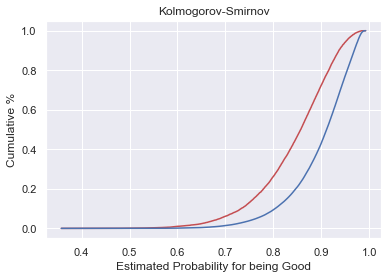

In [47]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [48]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS


# The value shows that the two cumulative distribution functions are sufficiently far away from each other,
# So that the model has satisfactory predictive power.

0.29627996710460136

# Applying the PD Model (Finally!!)

### Calculating PD of individual Accounts

In [49]:
pd.options.display.max_columns = None

inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:small_educ_moving,purpose:house_other_renewable_medical,purpose:wedding_vaca,purpose:credit_card,purpose:debt_consolidation,purpose:improve_major_car,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10+,mnths_since_issue_d: < 38,mnths_since_issue_d: 38~39,mnths_since_issue_d: 40~41,mnths_since_issue_d: 42~48,mnths_since_issue_d: 49~52,mnths_since_issue_d: 53~64,mnths_since_issue_d: 65~84,mnths_since_issue_d: > 84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mnths_since_earliest_cr_line:<164.36,mnths_since_earliest_cr_line:164.36-246.54,mnths_since_earliest_cr_line:264.54-270.72,mnths_since_earliest_cr_line:270.72-352.2,mnths_since_earliest_cr_line:352.2-399.16,mnths_since_earliest_cr_line:>399.16,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20k,annual_inc: 20k-30k,annual_inc: 30k-40k,annual_inc: 40k-50k,annual_inc: 50k-60k,annual_inc: 60k-70k,annual_inc: 70k-80k,annual_inc: 80k-90k,annual_inc: 90k-100k,annual_inc: 100k-120k,annual_inc: 120k-140k,annual_inc:>140k,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [50]:
# add relavant possibility value * 1 for any columns that has row_value = 1
# and don't add if row_value = 0
# then we get the probability of default.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.460291,NaN
1,grade:A,1.122070,3.876277e-35
2,grade:B,0.873111,2.034091e-46
3,grade:C,0.676501,4.661873e-33
4,grade:D,0.485834,1.029578e-19
5,grade:E,0.311854,4.409787e-11
6,grade:F,0.124431,1.138978e-02
7,home_ownership:OWN,0.095466,2.139606e-06
8,home_ownership:MORTGAGE,0.109057,5.670283e-18
9,addr_state:NM_VA,0.038096,2.342228e-01


In [51]:
y_hat_test_proba

# Here is the default rate for every given elements in 'Feature name'

array([0.92422308, 0.85061297, 0.8867065 , ..., 0.97243615, 0.95978986,
       0.95196936])

### Creating A ScoreCard (Simplyfied PD models)

In [52]:
# we need to include the reference table, when it comes to creating the scorecard.

ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:small_educ_moving',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mnths_since_issue_d: > 84',
 'int_rate:>20.281',
 'mnths_since_earliest_cr_line:<164.36',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20k',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [53]:
# change reference column into same type of column names in summary table
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

# And concat two tables
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()

# Create new column for better writing
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.460291,NaN,Intercept
1,1,grade:A,1.122070,3.876277e-35,grade
2,2,grade:B,0.873111,2.034091e-46,grade
3,3,grade:C,0.676501,4.661873e-33,grade
4,4,grade:D,0.485834,1.029578e-19,grade
5,5,grade:E,0.311854,4.409787e-11,grade
6,6,grade:F,0.124431,1.138978e-02,grade
7,7,home_ownership:OWN,0.095466,2.139606e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.109057,5.670283e-18,home_ownership
9,9,addr_state:NM_VA,0.038096,2.342228e-01,addr_state


In [54]:
# That is our best/worst credit score setup

min_score = 300
max_score = 850

In [55]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                      -1.460291
acc_now_delinq                  0.000000
addr_state                      0.000000
annual_inc                     -0.082734
dti                             0.000000
emp_length                      0.000000
grade                           0.000000
home_ownership                  0.000000
initial_list_status             0.000000
inq_last_6mths                  0.000000
int_rate                        0.000000
mnths_since_earliest_cr_line   -0.007339
mnths_since_issue_d            -0.082553
mths_since_last_delinq          0.000000
mths_since_last_record          0.000000
purpose                         0.000000
term                            0.000000
verification_status            -0.013178
Name: Coefficients, dtype: float64

In [56]:
# Sum all negative coefs
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

# this is our worst performing person (if there is one :| )

-1.6460943820345206

In [57]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                      -1.460291
acc_now_delinq                  0.187308
addr_state                      0.520412
annual_inc                      0.566872
dti                             0.384392
emp_length                      0.125260
grade                           1.122070
home_ownership                  0.109057
initial_list_status             0.055002
inq_last_6mths                  0.668834
int_rate                        0.876989
mnths_since_earliest_cr_line    0.102283
mnths_since_issue_d             1.069355
mths_since_last_delinq          0.182865
mths_since_last_record          0.504937
purpose                         0.593545
term                            0.078461
verification_status             0.081840
Name: Coefficients, dtype: float64

In [58]:
# The best performing person

max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.769191293233001

In [59]:
# variable score = variable coef * (max score - min score) / (max sum coef - min sum coef)

df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)


# Intercept is calculated slightly differently

df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.460291,NaN,Intercept,313.781218
1,1,grade:A,1.122070,3.876277e-35,grade,83.225187
2,2,grade:B,0.873111,2.034091e-46,grade,64.759590
3,3,grade:C,0.676501,4.661873e-33,grade,50.176813
4,4,grade:D,0.485834,1.029578e-19,grade,36.034849
5,5,grade:E,0.311854,4.409787e-11,grade,23.130527
6,6,grade:F,0.124431,1.138978e-02,grade,9.229149
7,7,home_ownership:OWN,0.095466,2.139606e-06,home_ownership,7.080841
8,8,home_ownership:MORTGAGE,0.109057,5.670283e-18,home_ownership,8.088905
9,9,addr_state:NM_VA,0.038096,2.342228e-01,addr_state,2.825595


In [60]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.

min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Here we can see the Max Score is 851, due to round-up method.

# Round back the one single value that was rounded up the most
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
# line 69 had the most adds up
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][69] = 28 # 29-1 

min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()


print('Min score: ', min_sum_score_prel)
print('Max score: ', max_sum_score_prel)

Min score:  300.0
Max score:  850.0


### Calculating Credit Score

Finally!

In [61]:
inputs_test_with_ref_cat.head(2)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:small_educ_moving,purpose:house_other_renewable_medical,purpose:wedding_vaca,purpose:credit_card,purpose:debt_consolidation,purpose:improve_major_car,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10+,mnths_since_issue_d: < 38,mnths_since_issue_d: 38~39,mnths_since_issue_d: 40~41,mnths_since_issue_d: 42~48,mnths_since_issue_d: 49~52,mnths_since_issue_d: 53~64,mnths_since_issue_d: 65~84,mnths_since_issue_d: > 84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mnths_since_earliest_cr_line:<164.36,mnths_since_earliest_cr_line:164.36-246.54,mnths_since_earliest_cr_line:264.54-270.72,mnths_since_earliest_cr_line:270.72-352.2,mnths_since_earliest_cr_line:352.2-399.16,mnths_since_earliest_cr_line:>399.16,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20k,annual_inc: 20k-30k,annual_inc: 30k-40k,annual_inc: 40k-50k,annual_inc: 50k-60k,annual_inc: 60k-70k,annual_inc: 70k-80k,annual_inc: 80k-90k,annual_inc: 90k-100k,annual_inc: 100k-120k,annual_inc: 120k-140k,annual_inc:>140k,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [62]:
df_scorecard

# use the first variable, 362514 as example. add score if they have value of 1 in above, dont add with 0 above.

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.460291,NaN,Intercept,313.781218,314.0,0.218782,314.0
1,1,grade:A,1.122070,3.876277e-35,grade,83.225187,83.0,-0.225187,83.0
2,2,grade:B,0.873111,2.034091e-46,grade,64.759590,65.0,0.240410,65.0
3,3,grade:C,0.676501,4.661873e-33,grade,50.176813,50.0,-0.176813,50.0
4,4,grade:D,0.485834,1.029578e-19,grade,36.034849,36.0,-0.034849,36.0
5,5,grade:E,0.311854,4.409787e-11,grade,23.130527,23.0,-0.130527,23.0
6,6,grade:F,0.124431,1.138978e-02,grade,9.229149,9.0,-0.229149,9.0
7,7,home_ownership:OWN,0.095466,2.139606e-06,home_ownership,7.080841,7.0,-0.080841,7.0
8,8,home_ownership:MORTGAGE,0.109057,5.670283e-18,home_ownership,8.088905,8.0,-0.088905,8.0
9,9,addr_state:NM_VA,0.038096,2.342228e-01,addr_state,2.825595,3.0,0.174405,3.0


In [63]:
# create intercept, but first we create new df for that
inputs_test_w_ref_cat_with_intercept = inputs_test_with_ref_cat

inputs_test_w_ref_cat_with_intercept.insert(0,'Intercept',1)

inputs_test_w_ref_cat_with_intercept = inputs_test_w_ref_cat_with_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

inputs_test_w_ref_cat_with_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:house_other_renewable_medical,purpose:wedding_vaca,purpose:credit_card,purpose:debt_consolidation,purpose:improve_major_car,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10+,mnths_since_issue_d: < 38,mnths_since_issue_d: 38~39,mnths_since_issue_d: 40~41,mnths_since_issue_d: 42~48,mnths_since_issue_d: 49~52,mnths_since_issue_d: 53~64,mnths_since_issue_d: 65~84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mnths_since_earliest_cr_line:164.36-246.54,mnths_since_earliest_cr_line:264.54-270.72,mnths_since_earliest_cr_line:270.72-352.2,mnths_since_earliest_cr_line:352.2-399.16,mnths_since_earliest_cr_line:>399.16,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc: 20k-30k,annual_inc: 30k-40k,annual_inc: 40k-50k,annual_inc: 50k-60k,annual_inc: 60k-70k,annual_inc: 70k-80k,annual_inc: 80k-90k,annual_inc: 90k-100k,annual_inc: 100k-120k,annual_inc: 120k-140k,annual_inc:>140k,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:small_educ_moving,initial_list_status:f,term:60,emp_length:0,mnths_since_issue_d: > 84,int_rate:>20.281,mnths_since_earliest_cr_line:<164.36,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [64]:
scorecard_scores = df_scorecard['Score - Final']

# Reshape scores to match
scorecard_scores = scorecard_scores.values.reshape(103, 1)

print(inputs_test_w_ref_cat_with_intercept.shape)
print(scorecard_scores.shape)

(93257, 103)
(103, 1)


In [65]:
# use dot product method -->> AKA df1.dot(df2)
y_scores = inputs_test_w_ref_cat_with_intercept.dot(scorecard_scores)
y_scores.columns = ['Credit Score'] # Rename the column
y_scores.head()

,Credit Score
362514,609.0
288564,551.0
213591,575.0
263083,630.0
165001,680.0


### From Credit Score to PD

In [66]:
sum_coef_from_score = ((y_scores - min_score)/(max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.


y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head(5)

,Credit Score
362514,0.925528
288564,0.850429
213591,0.887109
263083,0.942842
165001,0.970032


In [67]:
y_hat_test_proba[0:5]

array([0.92422308, 0.85061297, 0.8867065 , 0.94276864, 0.96946464])

Above are the reults, generated by PD model and ML train-test-split. 

Those results show the probability of non-default for each individual in the dataset.

They share similarities, but they have nuances in very small differences.

The reason behind is because when calculating credit scrore, we used .round() Function


# Setting Cut-offs

#### We copy paste Treshold calculation from above

In [68]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)


pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])


Predicted,0,1
Actual,,
0,7378,2812
1,35750,47317


In [69]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.079115,0.030153
1,0.383349,0.507383


In [70]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5864975283356746

Text(0.5, 1.0, 'ROC curve')

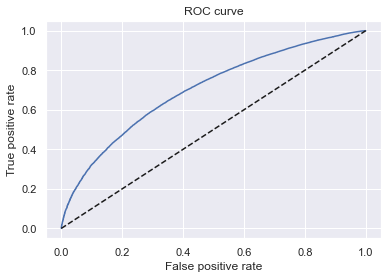

In [71]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

#### copy past ends.

In [72]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

# first value is meaningless -- it is Intercept! 
# reset it very very close to 1, to make sure this little one does not really affect any calculation below
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

# We could reverse credit score to get each probability of default

df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992770,0.000000,0.000012,787.0
2,0.990848,0.000000,0.000120,770.0
3,0.990669,0.000098,0.000120,768.0
4,0.989397,0.000098,0.000614,759.0


In [73]:
# see possible approval & rejection rate for each cut-offs

def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()


df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.


df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.


df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.


df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [74]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992770,0.000000,0.000012,787.0,1,93256,0.000011,0.999989
2,0.990848,0.000000,0.000120,770.0,10,93247,0.000107,0.999893
3,0.990669,0.000098,0.000120,768.0,11,93246,0.000118,0.999882
4,0.989397,0.000098,0.000614,759.0,52,93205,0.000558,0.999442


In [75]:
# Find boundaries for threshold! 

# Say 10% ( or 90% ) is our threshold,

# Then we could find the 5289th user is the very last qualifying customer

# approval rate = 0.537364， rejection rate = 0.462636

df_cutoffs.iloc[5200: 5300, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5200,0.901103,0.271050,0.563027,586.0,49531,43726,0.531124,0.468876
5201,0.901099,0.271148,0.563027,586.0,49532,43725,0.531134,0.468866
5202,0.901067,0.271148,0.563196,586.0,49546,43711,0.531285,0.468715
5203,0.901066,0.271246,0.563196,586.0,49547,43710,0.531295,0.468705
5204,0.901049,0.271246,0.563316,586.0,49557,43700,0.531402,0.468598
5205,0.901045,0.271344,0.563316,586.0,49558,43699,0.531413,0.468587
5206,0.901033,0.271344,0.563437,586.0,49568,43689,0.531520,0.468480
5207,0.901033,0.271443,0.563437,586.0,49569,43688,0.531531,0.468469
5208,0.901032,0.271443,0.563461,586.0,49571,43686,0.531553,0.468447
5209,0.901031,0.271541,0.563461,586.0,49572,43685,0.531563,0.468437


In [76]:
# Say 5% ( or 95% ) is our threshold

# Then we could find the 1166th user ， approval rate = 0.209325， rejection rate = 0.790675

df_cutoffs.iloc[1100: 1200, ]


,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1100,0.951356,0.054760,0.219269,643.0,18772,74485,0.201293,0.798707
1101,0.951337,0.054760,0.219401,643.0,18783,74474,0.201411,0.798589
1102,0.951336,0.054858,0.219401,643.0,18784,74473,0.201422,0.798578
1103,0.951332,0.054858,0.219413,643.0,18785,74472,0.201433,0.798567
1104,0.951332,0.054956,0.219413,643.0,18786,74471,0.201443,0.798557
1105,0.951321,0.054956,0.219449,643.0,18789,74468,0.201475,0.798525
1106,0.951314,0.055054,0.219449,643.0,18790,74467,0.201486,0.798514
1107,0.951280,0.055054,0.219678,643.0,18809,74448,0.201690,0.798310
1108,0.951278,0.055152,0.219678,643.0,18810,74447,0.201701,0.798299
1109,0.951274,0.055152,0.219702,642.0,18812,74445,0.201722,0.798278


That is how we use this table to perform Cut-off

One thing worth mentioning is that the credit score method is less reliable than threshold method.

Why? Because credit score are rounded values. It might contain a few more users that does not meet threshold to be approved.

Thus, increasing (even if it's just slightly) the probaility of overall default risk.

In [77]:
# Export Data

inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [78]:
# Export Data

df_scorecard.to_csv('df_scorecard.csv')

In [79]:
cowsay.pig('Still has a few more steps to finish our modeling and testing. See you in the next notebook.')

  _________________________________________________
 /                                                 \
| Still has a few more steps to finish our modeling |
|  and testing. See you in the next notebook.       |
 \                                                 /
                                                 \
                                                  \
                                                   \
                                                    \
                                                              ,.
                                                             (_|,.
                                                             ,' /, )_______   _
                                                         __j o``-'        `.'-)'
                                                         (")                 \'
                                                         `-j                |
                                                           `-._(         